In [104]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

In [ ]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path,['jpeg','jpg','png'])
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 152)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('./dogImages/train')
valid_files, valid_targets = load_dataset('./dogImages/valid')
test_files, test_targets = load_dataset('./dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("./dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))


In [107]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImages(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = 10
    if (number_of_files % col != 0):
        row += 1
    for i in range(row+10):
        a=fig.add_subplot(row, col, i + 1)
        image = imread(list_of_files[i])
        imshow(image)
        axis('off')

In [ ]:
showImages(test_files, wSize=20, hSize=20, col=4)

In [109]:
## find the list of labels and save them as a pandas data 
labels_train = []
labels_test = []

for i in range(train_files.shape[0]):
    labels_train.append(dog_names[np.argmax(train_targets[i])])
    
for i in range(test_files.shape[0]):
    labels_test.append(dog_names[np.argmax(test_targets[i])])

In [110]:
import random
import numpy as np
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("./lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


In [ ]:
import cv2                
#import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [112]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [99]:
from keras.preprocessing import image                  
from tqdm import tqdm
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [100]:
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 75s 1us/step


In [306]:
detect = ResNet50_model # Get model (Sequential, Functional Model, or Model subclass)
detect.save('./dogdetect')

INFO:tensorflow:Assets written to: ./dogdetect/assets


INFO:tensorflow:Assets written to: ./dogdetect/assets


In [174]:
                 
from tqdm import tqdm
from keras.utils import img_to_array
from keras.utils import load_img
import io
import os
import requests
from PIL import Image

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    #byteImgIO = io.BytesIO()
    #byteImg = Image.open(img_path)
    #byteImg.save(byteImgIO, "jpg")
    #byteImgIO.seek(0)
    #byteImg = byteImgIO.read()

    import os
    from PIL import Image
    #folder_path = r'data\Messidor_Classes'
    extensions = []
    #if '.DS_Store' in img_path:
       # img_path.replace('.DS_Store','')
    #im = Image.open(img_path)
    #rgb_im = im.convert('RGB')
    #if img_path.split('.')[1] not in extensions:
       # extensions.append(img_path.split('.')[1])

    # Non test code
    #dataBytesIO = io.BytesIO(byteImg)
    #Image.open(dataBytesIO)
    #byteImgIO = io.BytesIO()
    #Image.open(io.BytesIO(r.content))
    #img= Image.open(io.BytesIO(img_path))
    img = load_img(img_path, target_size=(224, 224))
   # byteImgIO.seek(0)
    #img= byteImgIO.read()
    #dataBytesIO = io.BytesIO(img)
    #img=load_img (dataBytesIO)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [114]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [115]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [237]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files)#.astype('float32')/255
valid_tensors = paths_to_tensor(valid_files)#.astype('float32')/255
test_tensors = paths_to_tensor(test_files)#.astype('float32')/255

 14%|█▍        | 1268/8969 [00:12<01:44, 74.01it/s] /Users/karimbenkirane/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  # If all 256 colors are in use,
100%|██████████| 925/925 [00:08<00:00, 106.43it/s]


In [238]:
def extract_Xception(tensor):
	from keras.applications.xception import Xception, preprocess_input
	return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [239]:
train_Xception=extract_Xception(train_tensors)

281/281 [==============================] - 608s 2s/step


In [240]:
valid_Xception=extract_Xception(valid_tensors)

30/30 [==============================] - 60s 2s/step


In [241]:
test_Xception=extract_Xception(test_tensors)

29/29 [==============================] - 68s 2s/step


In [116]:
bottleneck_features = np.load('./DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

In [ ]:
bottleneck_features['train'].shape()

In [242]:
train_Xception.shape

(8969, 7, 7, 2048)

In [243]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

In [ ]:
train_Xception

In [245]:
### Define your architecture.
Xception_model = Sequential()
Xception_model.add(GlobalAveragePooling2D(input_shape=(train_Xception.shape[1:])))
Xception_model.add(Dense(152, activation='softmax'))

Xception_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_10  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 152)               311448    
                                                                 
Total params: 311,448
Trainable params: 311,448
Non-trainable params: 0
_________________________________________________________________


In [246]:
Xception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [247]:
from keras.callbacks import ModelCheckpoint

In [248]:
### Train the model.
checkpointer_Xception = ModelCheckpoint(filepath='mod/weights.best.Xception.hdf5', verbose=1 , save_best_only =True)

Xception_history=Xception_model.fit(train_Xception, train_targets,
                  validation_data = (valid_Xception , valid_targets),
                  epochs=25, batch_size=20, callbacks=[checkpointer_Xception], verbose=1)

Epoch 1/25
441/449 [============================>.] - ETA: 0s - loss: 1.2580 - accuracy: 0.6706
Epoch 1: val_loss improved from inf to 0.68456, saving model to mod/weights.best.Xception.hdf5
449/449 [==============================] - 6s 12ms/step - loss: 1.2498 - accuracy: 0.6719 - val_loss: 0.6846 - val_accuracy: 0.7883
Epoch 2/25
440/449 [============================>.] - ETA: 0s - loss: 0.6135 - accuracy: 0.8181
Epoch 2: val_loss improved from 0.68456 to 0.68349, saving model to mod/weights.best.Xception.hdf5
449/449 [==============================] - 4s 8ms/step - loss: 0.6130 - accuracy: 0.8190 - val_loss: 0.6835 - val_accuracy: 0.8050
Epoch 3/25
442/449 [============================>.] - ETA: 0s - loss: 0.5233 - accuracy: 0.8441
Epoch 3: val_loss improved from 0.68349 to 0.65277, saving model to mod/weights.best.Xception.hdf5
449/449 [==============================] - 3s 7ms/step - loss: 0.5219 - accuracy: 0.8445 - val_loss: 0.6528 - val_accuracy: 0.8196
Epoch 4/25
446/449 [=====

In [249]:
Xception_model.load_weights('mod/weights.best.Xception.hdf5')

In [250]:
# a function that returns the prediction accuracy on test data
def evaluate_model (model, model_name,tensors,targets):
    predicted = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tensors]
    test_accuracy = 100*np.sum(np.array(predicted)==np.argmax(targets, axis=1))/len(predicted)
    
    print (f'{model_name} accuracy on test data is {test_accuracy}%') 


In [ ]:
evaluate_model(Xception_model,"Xception", test_Xception, test_targets)

In [252]:
import cv2                
import matplotlib.pyplot as plt  

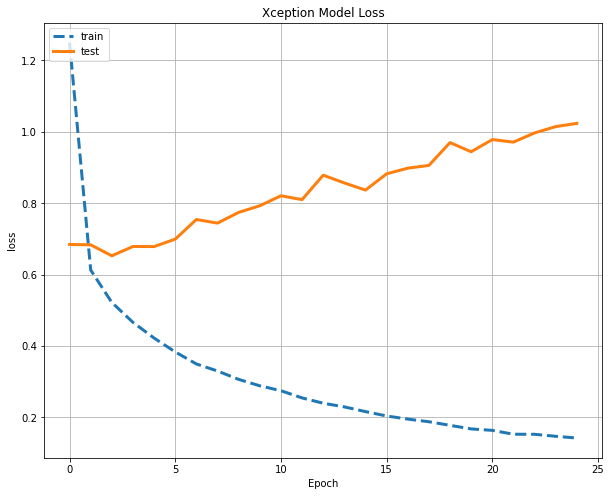

In [253]:
## plot the history of loss and accuracy for train and valid data for the best model, VGG19
loss = Xception_history.history['loss']
val_loss = Xception_history.history['val_loss']

plt.figure(figsize=(10,8))
plt.plot(loss,"--", linewidth=3 , label="train")
plt.plot(val_loss, linewidth=3 , label="valid")

plt.legend(['train','test'], loc='upper left')
plt.grid()
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.title('Xception Model Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [254]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
## VGG19 model with augmentation and fine tuning
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
VGG19_model_aug = Sequential()
VGG19_model_aug.add(GlobalAveragePooling2D(input_shape=(train_VGG19.shape[1:])))
VGG19_model_aug.add(BatchNormalization())
VGG19_model_aug.add(Dense(133, activation='softmax'))

traingen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
validgen = ImageDataGenerator(rescale=1/255)

traingen.fit(train_VGG19)
validgen.fit(valid_VGG19)

df_training = traingen.flow(train_VGG19 , train_targets , batch_size = 20)
df_validation = validgen.flow(valid_VGG19 , valid_targets, batch_size = 20)

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', verbose = 0, save_best_only=True)

sgd = SGD(lr= 1e-3 , decay=1e-6, momentum=0.9 , nesterov = True)

# compile 
VGG19_model_aug.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


VGG19_model_aug.fit_generator(df_training, epochs = 25 , steps_per_epoch = train_VGG19.shape[0]//20 , 
                   callbacks=[checkpointer] , verbose=1 , 
                   validation_data= df_validation , validation_steps = valid_VGG19.shape[0]//20)

In [ ]:
## here, again, with data augentation the accuracy decreased
evaluate_model(VGG19_model_aug, "fine_tuned VGG19" , test_VGG19, test_targets)


In [ ]:
Xception_model_aug = Sequential()
Xception_model_aug.add(GlobalAveragePooling2D(input_shape=(train_Xception.shape[1:])))
Xception_model_aug.add(BatchNormalization())
Xception_model_aug.add(Dense(152, activation='softmax'))


checkpointer = ModelCheckpoint(filepath='mod/weights.best.Xception.hdf5', verbose = 0, save_best_only=True)

sgd = SGD(lr= 1e-3 , decay=1e-6, momentum=0.9 , nesterov = True)

# compile 
Xception_model_aug.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


Xception_model_aug.fit(train_Xception , train_targets, 
               validation_data = (valid_Xception, valid_targets),
               shuffle = True,
               batch_size = 20,
               epochs = 25,
               verbose = 1)

In [ ]:
## with fine tuning the accuracy increased by almost 1.5% 
evaluate_model(Xception_model_aug, "fine_tuned Xception" , test_Xception, test_targets)

In [257]:
### a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
def Xception_predict_breed (img_path):
    # extract the bottle neck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path)) 
    ## get a vector of predicted values
    predicted_vector = Xception_model_aug.predict(bottleneck_feature) 
    
    ## return the breed
    return dog_names[np.argmax(predicted_vector)]

In [258]:
### Write your algorithm.

def display_img(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    return imgplot

def breed_identifier(img_path):
    display_img(img_path)
    prediction = Xception_predict_breed(img_path)
    return print (f"This dog is a {prediction}\n")
    
    

In [259]:
model = Xception_model_aug  # Get model (Sequential, Functional Model, or Model subclass)
model.save('./mod')

INFO:tensorflow:Assets written to: ./mod/assets


In [260]:
from tensorflow import keras
model = keras.models.load_model('./mod')

In [85]:
model

1/1 [==============================] - 0s 17ms/step
This dog is a 4.Rottweiller



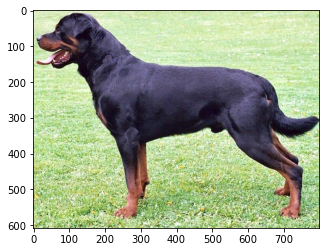

In [269]:
breed_identifier('/Users/karimbenkirane/hello/Dog_breeds/dogImages/test/134.Rottweiller/Rottweiller2.jpeg')

In [232]:
import numpy as np
from keras.applications.xception import Xception,preprocess_input

In [300]:
import re


In [301]:
def display_img(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    return imgplot
    
def breed_identifier(img_path):
    display_img(img_path)
    prediction = Xception_predict_breed(img_path)
    pred=re.sub(r'\d+','',prediction)
    if dog_detector(img_path) == True:
        print('picture is a dog')
        return print (f"This dog is a {pred}\n")
    
    if face_detector(img_path) == True:
        print('This is a human, "BACHARE" as we Moroccan say')
        return print (f"This person looks like a {pred}\n")
        display_img("")
    
    else:
        return print(f'Not sure if it is a dog, if so it is a {pred}\n')

In [287]:
type(prediction)

NameError: name 'prediction' is not defined

1/1 [==============================] - 0s 374ms/step
This is a human, "BACHARE" as we Moroccan say
This person looks like a .Continental_bulldog



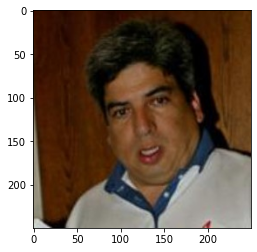

In [302]:
breed_identifier('/Users/karimbenkirane/hello/Dog_breeds/lfw/Aaron_Pena/Aaron_Pena_0001.jpg')